In [3]:
import numpy as np
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

def plot():
    %matplotlib inline
    plt.figure(figsize=(12,9))
    ax = plt.subplot(311)
    plt.plot(x, w_mhe, label='Dry Weight')
    plt.plot(x, y, 'r:', label='Data')
    plt.grid()
    plt.legend()
    plt.ylabel('Plant Weight (g)')

    plt.subplot(312, sharex=ax)
    plt.plot(x, dNup_mhe, label='dNup')
    plt.grid()
    plt.legend()
    plt.ylabel('Nitrogen Changes (mmol / day)')

    plt.subplot(313, sharex=ax)
    plt.plot(x, solar/1e6)
    plt.grid()
    plt.ylabel('Light Intensity (MJ)')

    #plt.xlim(0, tf)
    plt.xlabel('Time (days)')

## Import Data

In [4]:
data = np.loadtxt('exp1.csv', delimiter=',')
x = data[:,0]
y = data[:,1]
# plt.plot(x, y)

solar_constant = 7.1e6  # Megajoules
solar_on = 0.25       # On at 6 AM
solar_off = 0.75      # Off at 6 PM
solar = np.zeros(len(x))
for i in range(len(x)):
    if solar_on < x[i] % 1 < solar_off:
        solar[i] = solar_constant

alpha0=0.150
Jmax_00 = 0.0498*24
K0 = 0.0525

a = Aquaponics('hydroplant', T0=20, N0=0.1, K=K0, 
                Jmax_0=Jmax_00, alpha=alpha0, kswitch=1)

m = a.get_model()

a.K.FSTATUS=0
a.K.STATUS=1
a.K.UPPER = 0.1
a.K.LOWER = 0.005

a.Jmax_0.FSTATUS=0
a.Jmax_0.STATUS=1
a.Jmax_0.LOWER = 0.02*24
a.Jmax_0.UPPER = 0.08*24

a.alpha.FSTATUS=0
a.alpha.STATUS=1
a.alpha.LOWER = 0.10
a.alpha.UPPER = 0.2

a.w.FSTATUS = 1
a.w.STATUS = 1
a.w.MEAS_GAP = 0.1

#6 time points in horizon
m.time = np.linspace(0,.1,2)

In [5]:
# Allocate storage
w_mhe = np.zeros(len(x))
K_mhe = np.ones(len(x)) * K0
Jmax_0_mhe = np.ones(len(x)) * Jmax_00
alpha_mhe = np.ones(len(x)) * alpha0
dNup_mhe = np.zeros(len(x)) 

for i in range(0, len(x)):
    
    a.I.value = solar[i]
    a.w.MEAS = y[i]    
    a.solve(glamdring=True, imode=5, disp=False)
    
    # check if successful
    if m.options.APPSTATUS == 1:
        # retrieve solution
        w_mhe[i] = a.w.MODEL
        K_mhe[i] = a.K.NEWVAL
        Jmax_0_mhe[i] = a.Jmax_0.NEWVAL
        alpha_mhe[i] = a.alpha.NEWVAL
        dNup_mhe[i] = a.dNup.VALUE[-1]
    else:
        # failed solution
        w_mhe[i] = 0
        K_mhe[i] = 0
        Jmax_0_mhe[i] = 0
        alpha[i] = 0
        dNup_mhe[i] = 0

    print('MHE results: K: {}, Jmax_0: {}, alpha: {}'.format(
        K_mhe[i], Jmax_0_mhe[i], alpha_mhe[i]))
    

MHE results: K: 0.0383855341, Jmax_0: 1.39389731, alpha: 0.145662984
MHE results: K: 0.0463971094, Jmax_0: 1.31529235, alpha: 0.148303906
MHE results: K: 0.0476669247, Jmax_0: 1.07240462, alpha: 0.150759132
MHE results: K: 0.0510010176, Jmax_0: 1.13206634, alpha: 0.149764651
MHE results: K: 0.0507377166, Jmax_0: 1.46187781, alpha: 0.149424234
MHE results: K: 0.0519622151, Jmax_0: 1.38683966, alpha: 0.149828549
MHE results: K: 0.0512883602, Jmax_0: 1.32093841, alpha: 0.149686349
MHE results: K: 0.0514967108, Jmax_0: 1.28209859, alpha: 0.149725941
MHE results: K: 0.0521183105, Jmax_0: 1.25770786, alpha: 0.149879027
MHE results: K: 0.0520119576, Jmax_0: 1.24291089, alpha: 0.149843006
MHE results: K: 0.0522402544, Jmax_0: 1.2329404, alpha: 0.14990418
MHE results: K: 0.0523860618, Jmax_0: 1.22584585, alpha: 0.149947535
MHE results: K: 0.0523841711, Jmax_0: 1.2213514, alpha: 0.149945378
MHE results: K: 0.0517999832, Jmax_0: 1.21821512, alpha: 0.149733459
MHE results: K: 0.0518066859, Jmax_0:

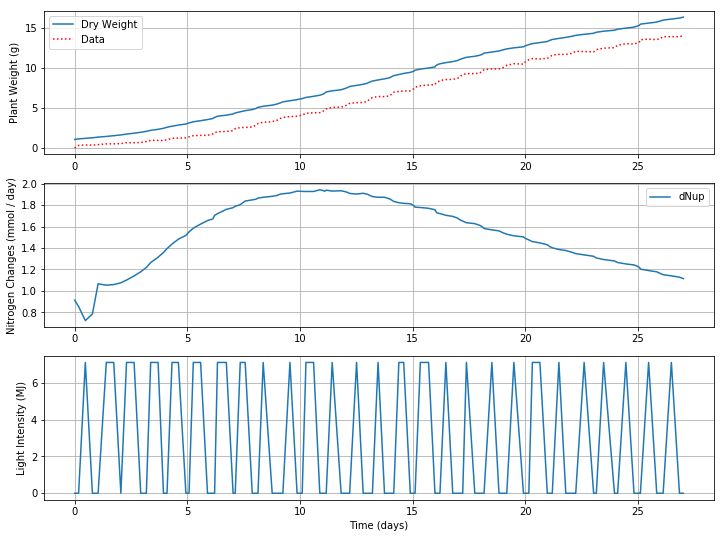

In [6]:
plot()

In [ ]:
plot()

In [ ]:
a = Aquaponics('hydroplant', T0=20, N0=0.1, K=K0, 
                Jmax_0=Jmax_00, alpha=alpha0, kswitch=1)

m = a.get_model()

m.time = x
a.solve(glamdring=True, imode=7, disp=False)

In [ ]:
plot()